Path For the Dataset


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/uber-ride-analytics-dashboard


Important Library


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DataFrame


In [4]:
df=pd.read_csv(path+'/ncr_ride_bookings.csv')


In [5]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [8]:
df.shape

(150000, 21)

Converting date and time as day, month, weekday, hour


In [9]:
df['datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'])

df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour


In [10]:
df.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,datetime,day,month,weekday,hour
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,23,3,5,12


Checking missing Values


In [11]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [12]:
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())


In [13]:
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())


In [14]:
df['Cancelled Rides by Customer']=df['Cancelled Rides by Customer'].fillna(0)

In [15]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("Not Provided")


In [16]:
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)


In [17]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("Not Provided")


In [18]:
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)


In [19]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("Not Provided")


In [20]:
df['Booking Value'] = df['Booking Value'].fillna(df['Booking Value'].median())


In [21]:
df['Ride Distance'] = df['Ride Distance'].fillna(df['Ride Distance'].median())


In [22]:
df['Driver Ratings'] = df['Driver Ratings'].fillna(df['Driver Ratings'].median())


In [23]:
df['Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].median())


In [24]:
df['Payment Method'] = df['Payment Method'].fillna("Unknown")


In [25]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


Checking Duplicate Rows


In [26]:
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


Visualizations


Distribution of ride distances

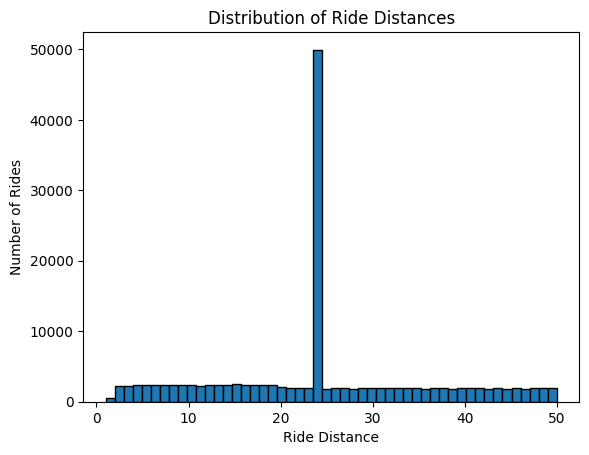

In [27]:
plt.hist(df['Ride Distance'], bins=50, edgecolor='black')
plt.xlabel('Ride Distance')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Distances')
plt.show()

Common pickup and drop location


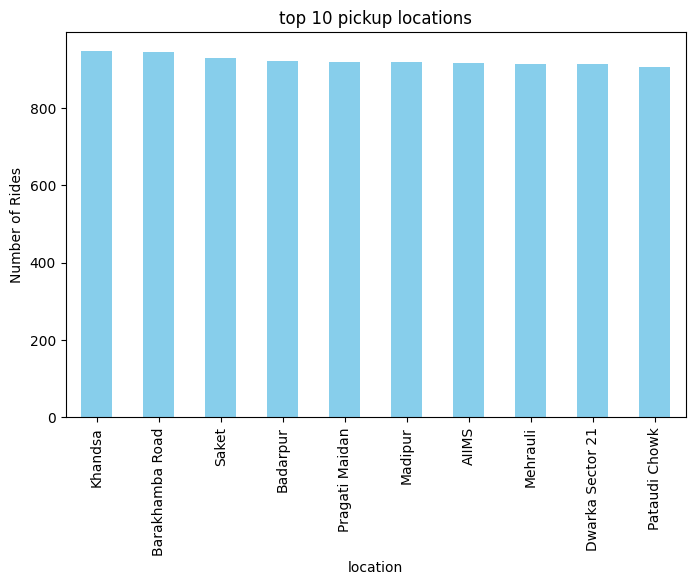

In [28]:
df['Pickup Location'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('top 10 pickup locations')
plt.xlabel('location')
plt.ylabel('Number of Rides')
plt.show()

Trend of rides over time

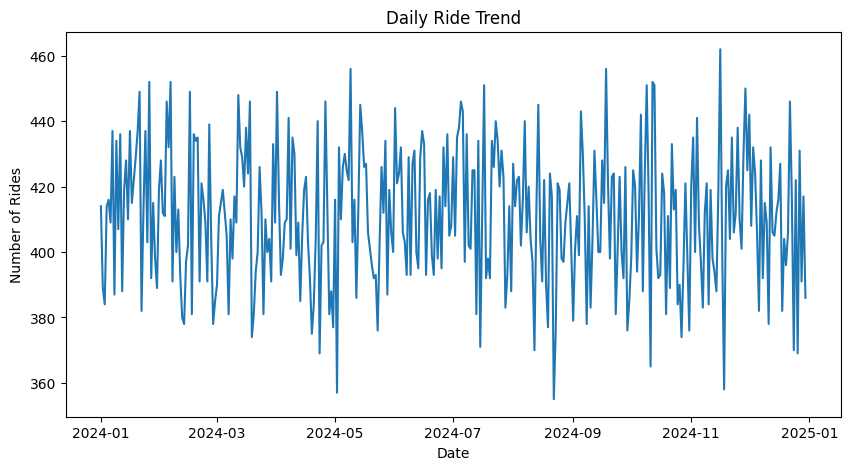

In [29]:
df['Date']=pd.to_datetime(df['Date'])
rides_per_day=df.groupby(df['Date'].dt.date).size()

rides_per_day.plot(kind='line', figsize=(10,5))
plt.title('Daily Ride Trend')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

Most preferred Vechicle Type


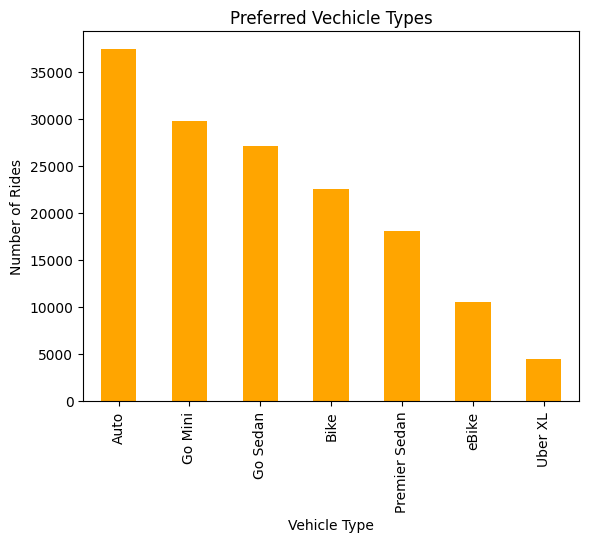

In [30]:
df['Vehicle Type'].value_counts().plot(kind='bar', color='orange')
plt.title('Preferred Vechicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Rides')
plt.show()

Rides Cancelled by Customer vs Drivers


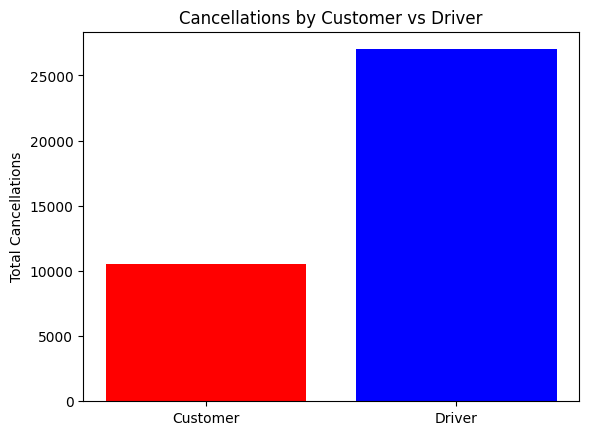

In [31]:
Cancellation={
    'Customer':df['Cancelled Rides by Customer'].sum(),
    "Driver": df['Cancelled Rides by Driver'].sum()
}
plt.bar(Cancellation.keys(), Cancellation.values(), color=['red', 'blue'])
plt.title('Cancellations by Customer vs Driver')
plt.ylabel('Total Cancellations')
plt.show()

Distribution of Customer and Driver ratings

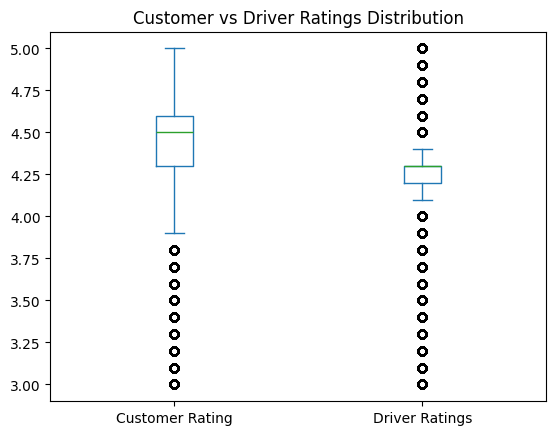

In [32]:
df[['Customer Rating', 'Driver Ratings']].plot(kind='box')
plt.title('Customer vs Driver Ratings Distribution')
plt.show()

Payment method

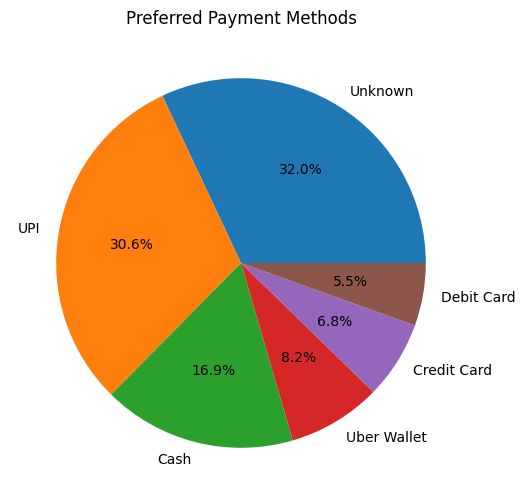

In [33]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Preferred Payment Methods")
plt.ylabel("")
plt.show()


Booking Value Vs Ride distance

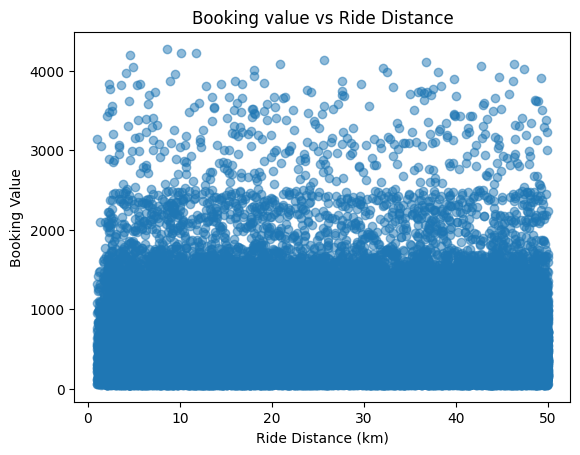

In [34]:
plt.scatter(df['Ride Distance'], df['Booking Value'], alpha=0.5)
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.title("Booking value vs Ride Distance")
plt.show()

Peak Hours of Rides

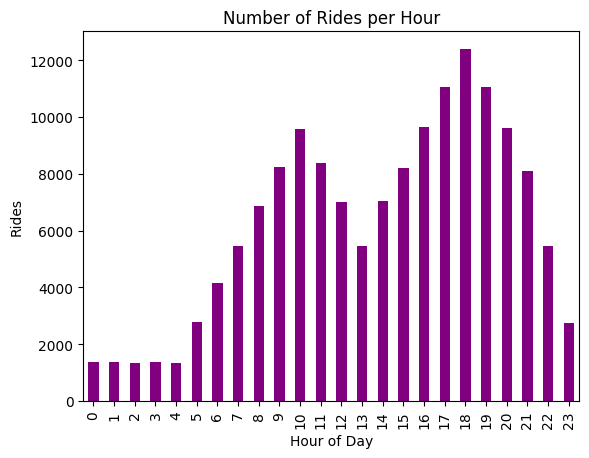

In [35]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['hour'] = df['Time'].dt.hour

df['hour'].value_counts().sort_index().plot(kind='bar', color="purple")
plt.title("Number of Rides per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Rides")
plt.show()


Top Reasons for Cancellations


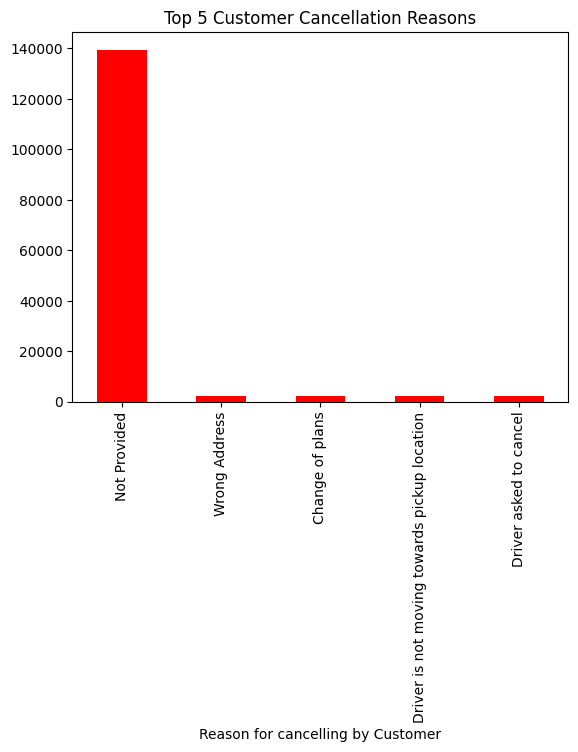

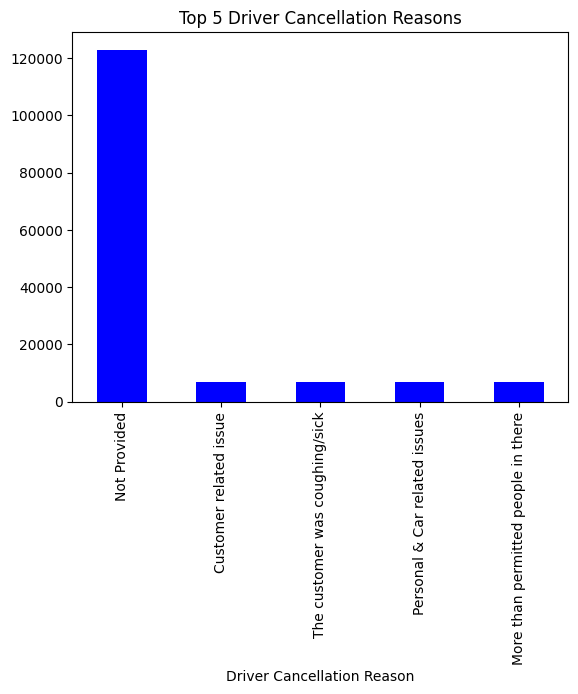

In [36]:
df['Reason for cancelling by Customer'].value_counts().head(5).plot(kind='bar', color="red")
plt.title("Top 5 Customer Cancellation Reasons")
plt.show()

df['Driver Cancellation Reason'].value_counts().head(5).plot(kind='bar', color="blue")
plt.title("Top 5 Driver Cancellation Reasons")
plt.show()


Average Booking Value across diff vehicle types

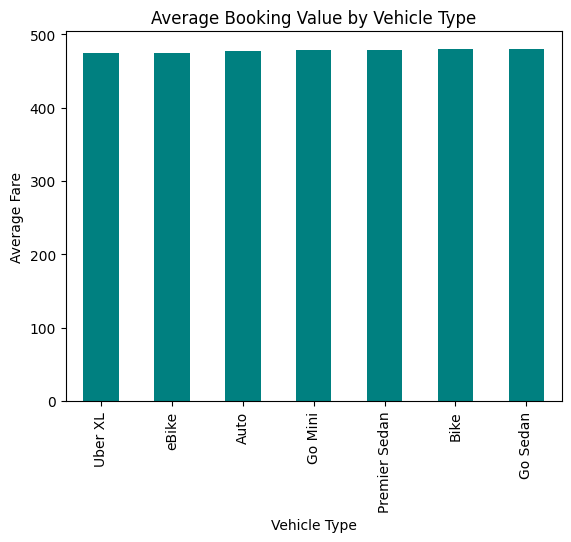

In [37]:
df.groupby('Vehicle Type')['Booking Value'].mean().sort_values().plot(kind='bar', color="teal")
plt.title("Average Booking Value by Vehicle Type")
plt.ylabel("Average Fare")
plt.xlabel("Vehicle Type")
plt.show()


Highest Cancellation location

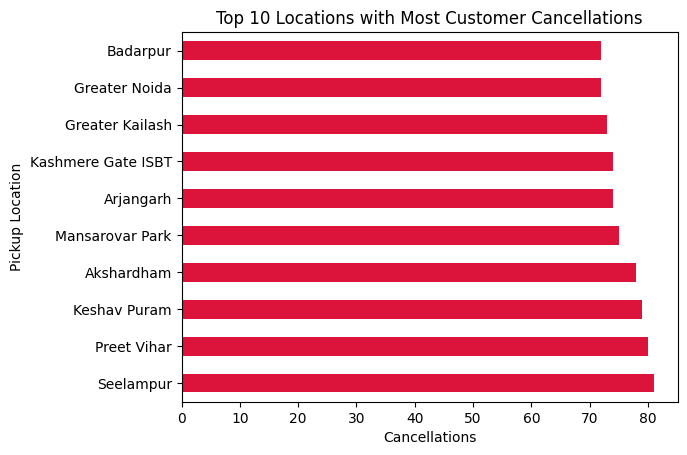

In [38]:
df.groupby('Pickup Location')['Cancelled Rides by Customer'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color="crimson")
plt.title("Top 10 Locations with Most Customer Cancellations")
plt.xlabel("Cancellations")
plt.ylabel("Pickup Location")
plt.show()


Distribution of Booking Status

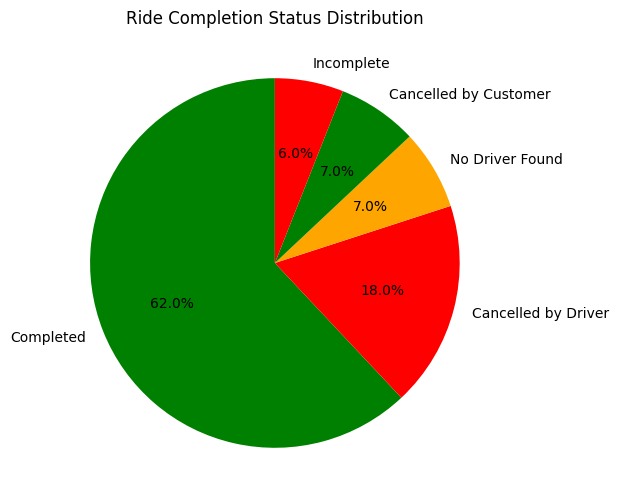

In [39]:
df['Booking Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=["green","red","orange"])
plt.title("Ride Completion Status Distribution")
plt.ylabel("")
plt.show()


Revenue Contributionn by vehicle Type

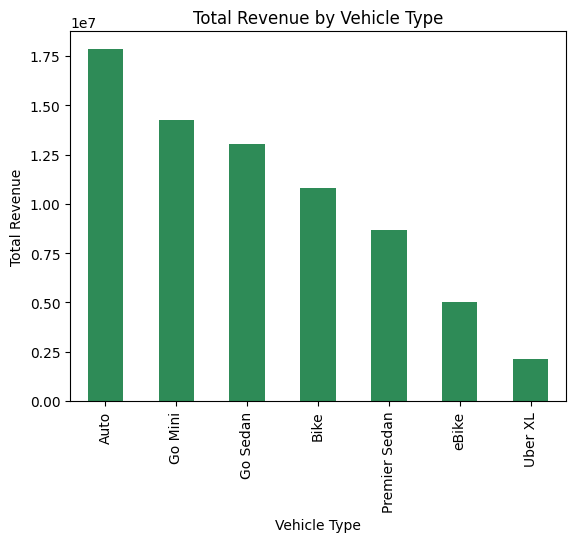

In [40]:
revenue = df.groupby("Vehicle Type")["Booking Value"].sum().sort_values(ascending=False)
revenue.plot(kind="bar", color="seagreen")
plt.title("Total Revenue by Vehicle Type")
plt.ylabel("Total Revenue")
plt.show()


Hypothesis Testing

In [41]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Payment Method'], df['Booking Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test for Payment Method vs Booking Status")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print(" Reject H₀ → Payment Method affects cancellations.")
else:
    print(" Fail to Reject H₀ → No significant effect of Payment Method.")


Chi-Square Test for Payment Method vs Booking Status
Chi2 Statistic: 150001.3303877049
p-value: 0.0
 Reject H₀ → Payment Method affects cancellations.


ride distance for canelled hyptthesis test

In [42]:
from scipy.stats import ttest_ind

cancelled = df[df['Booking Status'] == 0]['Ride Distance']
completed = df[df['Booking Status'] == 2]['Ride Distance']

t_stat, p_val = ttest_ind(cancelled, completed, equal_var=False)

print("\nT-Test for Ride Distance vs Booking Status")
print("T-Statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print(" Reject H₀ → Cancelled rides have different (likely shorter) distances.")
else:
    print(" Fail to Reject H₀ → No significant difference in distances.")



T-Test for Ride Distance vs Booking Status
T-Statistic: nan
p-value: nan
 Fail to Reject H₀ → No significant difference in distances.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [43]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'datetime',
       'day', 'month', 'weekday', 'hour'],
      dtype='object')

Feature Engineering


In [44]:
for col in ["Booking ID", "Customer ID"]:
    if col in df.columns:
        df[col] = df[col].astype("string")

In [45]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Booking Status', 'Vehicle Type', 'Pickup Location',
            'Drop Location', 'Reason for cancelling by Customer',
            'Driver Cancellation Reason', 'Incomplete Rides Reason',
            'Payment Method']

le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

from sklearn.preprocessing import StandardScaler

num_cols = ['Avg VTAT','Avg CTAT','Booking Value','Ride Distance',
            'Driver Ratings','Customer Rating']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Model Building And Evaluation

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df2=df

In [48]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'datetime',
       'day', 'month', 'weekday', 'hour'],
      dtype='object')

In [49]:
df = df.drop(['Driver Cancellation Reason','Incomplete Rides Reason','Reason for cancelling by Customer','Cancelled Rides by Customer',], axis=1)


In [50]:
df = df.drop([], axis=1)


In [51]:
leak_cols = ['Cancelled Rides by Driver', 'Incomplete Rides']
X = df.drop(columns=['Booking Status'] + leak_cols)
y = df['Booking Status']


In [52]:
X.columns

Index(['Date', 'Time', 'Booking ID', 'Customer ID', 'Vehicle Type',
       'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT',
       'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating',
       'Payment Method', 'datetime', 'day', 'month', 'weekday', 'hour'],
      dtype='object')

In [53]:
X = X.drop(['Date', 'Time', 'datetime', 'Booking ID', 'Customer ID'], axis=1)


In [54]:
df2.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,datetime,day,month,weekday,hour
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",4,"""CID1982111""",6,116,68,-0.039955,-0.032378,...,-0.194697,-0.053968,0.123792,0.170075,5,2024-03-23 12:29:38,23,3,5,12


In [55]:
X.head(1)

,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,day,month,weekday,hour
0,6,116,68,-0.039955,-0.032378,-0.194697,-0.053968,0.123792,0.170075,5,23,3,5,12


In [56]:
y.head()

,Booking Status
0,4
1,3
2,2
3,2
4,2


In [57]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
X_test.head(1)

,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,day,month,weekday,hour
8739,2,17,123,0.124912,1.710772,-0.282752,0.853917,-0.165545,-1.554885,4,12,3,1,18


Random Forest classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_cls = RandomForestClassifier(random_state=42)
model_cls.fit(X_train, y_train)

y_pred = model_cls.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9646666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70      2100
           1       0.85      0.99      0.91      5400
           2       1.00      1.00      1.00     18600
           3       0.99      1.00      1.00      1800
           4       0.96      1.00      0.98      2100

    accuracy                           0.96     30000
   macro avg       0.96      0.90      0.92     30000
weighted avg       0.97      0.96      0.96     30000


Confusion Matrix:
 [[ 1120   967     0     0    13]
 [    2  5334     0     0    64]
 [    0     0 18586    14     0]
 [    0     0     0  1800     0]
 [    0     0     0     0  2100]]


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Importance of Features


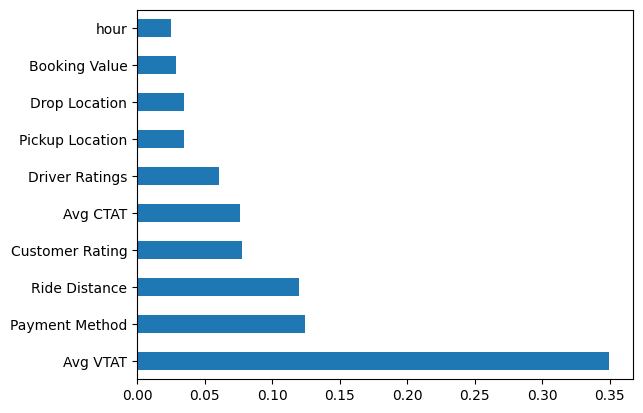

In [61]:

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


Regression


In [62]:
X2 = df.drop(columns=['Booking Value', 'Booking Status'])
y2 = df['Booking Value']


In [63]:
X2 = X2.drop(['Date', 'Time', 'datetime', 'Booking ID', 'Customer ID'], axis=1)


In [64]:
X2.columns

Index(['Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Driver', 'Incomplete Rides',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method',
       'day', 'month', 'weekday', 'hour'],
      dtype='object')

In [65]:
X2 = pd.get_dummies(X2, columns=['Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method'], drop_first=True)


In [66]:
X2 = X2.astype(int)


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [69]:

X_train2.head()

,Avg VTAT,Avg CTAT,Cancelled Rides by Driver,Incomplete Rides,Ride Distance,Driver Ratings,Customer Rating,day,month,weekday,...,Drop Location_171,Drop Location_172,Drop Location_173,Drop Location_174,Drop Location_175,Payment Method_1,Payment Method_2,Payment Method_3,Payment Method_4,Payment Method_5
104025,-1,1,0,0,0,0,0,12,2,0,...,0,0,0,0,0,1,0,0,0,0
5415,-1,0,0,1,-1,0,0,4,9,2,...,0,0,0,0,0,0,0,0,0,0
75612,-1,1,0,0,1,1,0,12,11,1,...,0,0,0,0,0,1,0,0,0,0
138169,1,-1,0,0,-1,-1,0,14,6,4,...,0,0,0,0,0,0,0,1,0,0
87184,1,0,0,0,-1,0,0,18,7,3,...,0,0,0,0,0,0,0,0,1,0


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(
    random_state=42,
    n_estimators=50,
    max_depth=10,
    n_jobs=-1
)

model.fit(X_train2, y_train2)

y_pred = model.predict(X_test2)

print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("R² Score:", r2_score(y_test2, y_pred))


RMSE: 0.9598629351136433
R² Score: 0.07723268637950786


Unsupervised Machine Learning

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [72]:
features = ['Avg VTAT', 'Avg CTAT', 'Ride Distance',
            'Driver Ratings', 'Customer Rating', 'Cancelled Rides by Driver', 'Incomplete Rides']

X = df[features]

Scaling data

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Kmeans Clustering

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # try 3 clusters
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print("Cluster counts:\n", df['Cluster'].value_counts())

Cluster counts:
 Cluster
2    114000
1     27000
0      9000
Name: count, dtype: int64


Dimensionality reduction

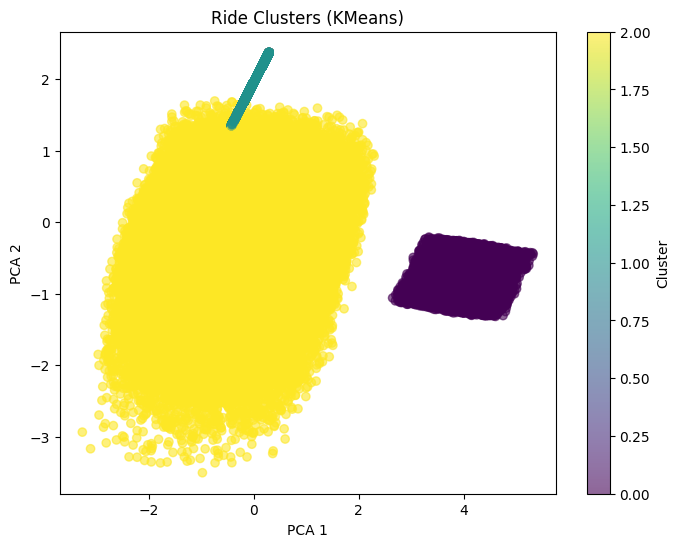

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Ride Clusters (KMeans)")
plt.colorbar(label="Cluster")
plt.show()

Anomaly Detection

Anomaly counts:
 Anomaly
 1    147000
-1      3000
Name: count, dtype: int64


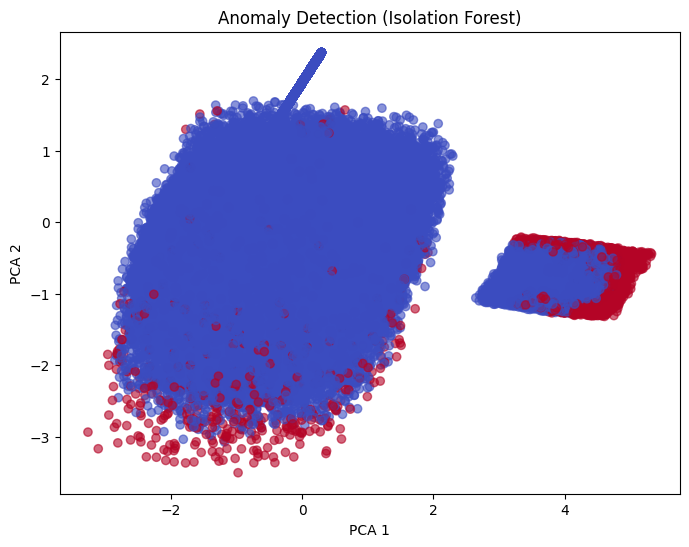

In [76]:
iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(X_scaled)

df['Anomaly'] = outliers

print("Anomaly counts:\n", df['Anomaly'].value_counts())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=(outliers==-1), cmap='coolwarm', alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Anomaly Detection (Isolation Forest)")
plt.show()

LIME / SHAP (Model Explainability)

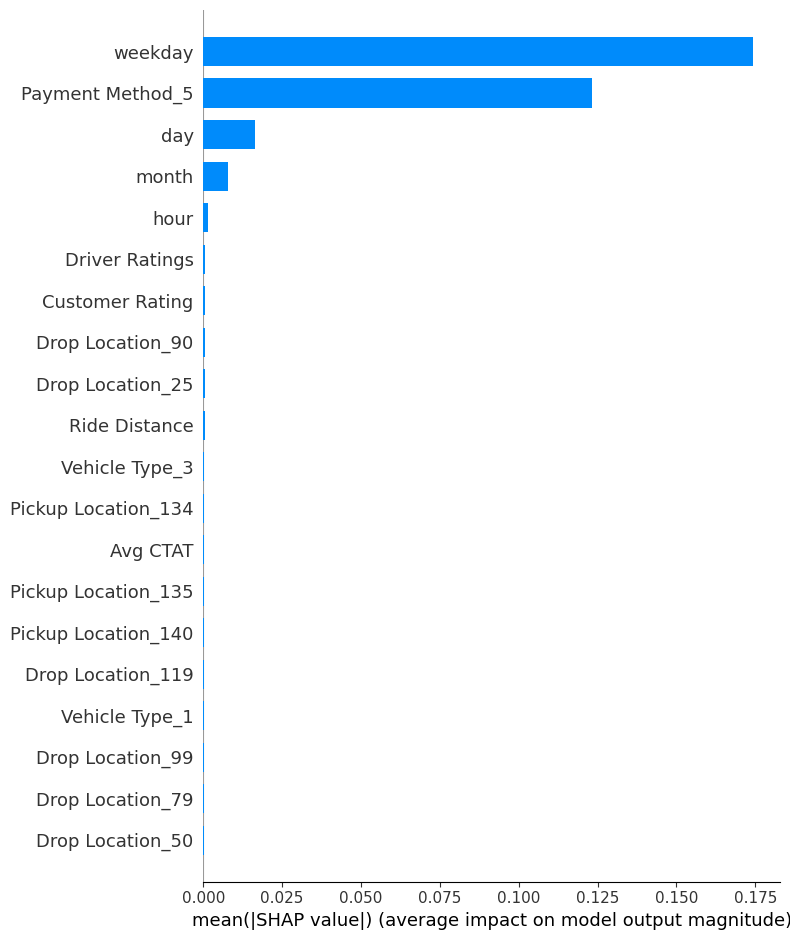

In [77]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test2)

shap.summary_plot(shap_values, X_test2, plot_type="bar")

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test2.iloc[0,:])


Performance metrics

In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train2, y_train2, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation R² scores: [0.06935887 0.07954451 0.076491   0.07696349 0.07303177]
Mean CV Score: 0.07507792859526827


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred_class = model_cls.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Confusion Matrix:
 [[ 1120   967     0     0    13]
 [    2  5334     0     0    64]
 [    0     0 18586    14     0]
 [    0     0     0  1800     0]
 [    0     0     0     0  2100]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70      2100
           1       0.85      0.99      0.91      5400
           2       1.00      1.00      1.00     18600
           3       0.99      1.00      1.00      1800
           4       0.96      1.00      0.98      2100

    accuracy                           0.96     30000
   macro avg       0.96      0.90      0.92     30000
weighted avg       0.97      0.96      0.96     30000



Deployment

In [80]:
import pickle

In [81]:
with open('model.pkl', 'wb') as file:
  pickle.dump(model_cls, file)

In [82]:
with open('model_r.pkl', 'wb') as file:
  pickle.dump(model, file)

In [83]:
print('numpy', np.__version__)
print('pandas', pd.__version__)
import sklearn
print(sklearn.__version__)


numpy 2.0.2
pandas 2.2.2
1.6.1


In [86]:
import joblib

model_cls.fit(X, y)
joblib.dump(model_cls, 'model.pkl')
joblib.dump(X.columns, 'model_columns.pkl')


['model_columns.pkl']